In [2]:
prof_result = [1214.0, 759.5, 1164.25, 977.25, 1201.0, 930.0, 1427.75, 799.5, 1006.25, 783.5, 728.5, 419.25, 1389.5, 730.0, 1306.25, 675.5, 1359.5, 1000.25, 1284.5, 1350.0, 751.0, 1418.75, 1276.5, 1645.75, 860.0, 745.5, 1426.25, 783.5, 1149.75, 1482.25]

#resultados = [1596.25, 1879.5, 1730.25, 1535.75, 1554.0, 1661.5, 1076.75, 1669.25, 1845.25, 1494.0, 1722.5, 1600.5, 1121.5, 1254.0, 1587.0, 1678.5, 1488.0, 1928.0, 1721.25, 1485.5, 1425.5, 1292.25, 1509.25, 1455.75, 1712.0, 1881.75, 1821.75, 1616.0, 1666.25, 1427.25]

resultados = [3570.75, 4406.75, 2790.0, 3273.0, 3749.5, 3232.25, 3965.0, 3268.5, 3273.0, 2751.5, 3994.25, 4125.25, 2675.0, 4640.0, 3508.25, 2214.0, 4016.5, 3214.25, 4156.5, 3205.75, 3796.75, 3141.5, 2719.25, 3146.5, 4319.0, 3351.25, 3214.25, 2944.75, 3208.5, 2234.75]

In [3]:
from scipy import stats
import numpy as np
def report(scores):
   
    print(f'Media: {scores.mean():.2f}, Desvio Padrao: {scores.std():.2f}')
    inf, sup = stats.norm.interval(0.95, loc=scores.mean(), 
                               scale=scores.std()/np.sqrt(len(scores)))
    print(f'Intervalo de confiança (95%): [{inf:.2f},{sup:.2f}]')

    return scores.mean(),scores.std(),inf,sup

In [4]:
report(np.array(prof_result))

Media: 1068.18, Desvio Padrao: 304.04
Intervalo de confiança (95%): [959.39,1176.98]


(1068.1833333333334, 304.0355237833603, 959.3876176063001, 1176.9790490603668)

In [5]:
report(np.array(resultados))

Media: 3403.55, Desvio Padrao: 604.82
Intervalo de confiança (95%): [3187.12,3619.98]


(3403.55, 604.8247625001255, 3187.120215391931, 3619.979784608069)

<AxesSubplot:>

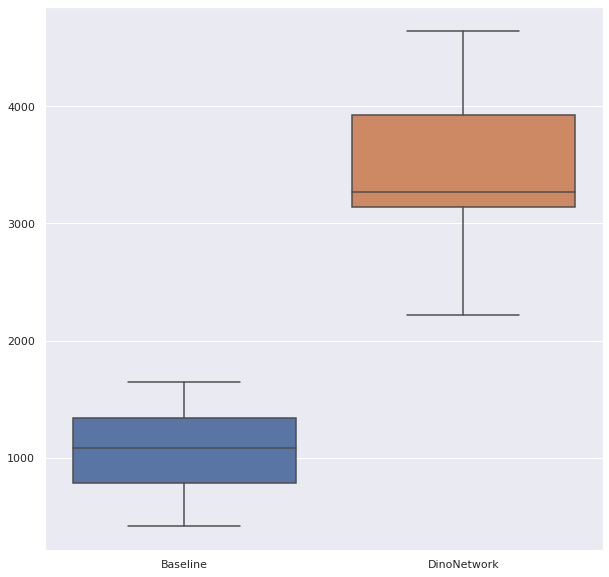

In [6]:
import seaborn as sns
import pandas as pd

all_scores = {'Baseline':prof_result,'DinoNetwork':resultados}

all_s = pd.DataFrame(all_scores)
sns.set(rc={'figure.figsize':(10,10)})
sns.boxplot(data=all_s)

In [7]:
from scipy import stats
from itertools import combinations
classifiers = ['Baseline','DinoNetwork']

print("\n Teste t Pareado \n")
for i in list(combinations(classifiers, 2)):
  classifier1 = i[0]
  classifier2 = i[1]
  p_value = stats.ttest_rel(all_scores[classifier1],all_scores[classifier2])[1]
  print(f"{classifier1} com {classifier2}  {p_value:.72f}")

print("\n Teste Não Paramétrico de Wilcoxon. \n")
for i in list(combinations(classifiers, 2)):
  classifier1 = i[0]
  classifier2 = i[1]
  p_value = stats.wilcoxon(all_scores[classifier1],all_scores[classifier2])[1]
  print(f"{classifier1} com {classifier2}  {p_value:.72f}")


 Teste t Pareado 

Baseline com DinoNetwork  0.000000000000000160682903206319159175619122347139282450192117389191348575

 Teste Não Paramétrico de Wilcoxon. 

Baseline com DinoNetwork  0.000001734397628320578403572811698740707697652396745979785919189453125000
